# Machine Learning Project - Beginner 3
## Prepare Problem
- Load Libraries
- Load Dataset

In [4]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
# Load the dataset
dataset = pd.read_csv('./data/sonar.all-data.csv', header = None)

## Summarize Data
- Descriptive statistics
- Data Visualisations

In [23]:
#shape 
print(dataset.shape)

(208, 61)


In [24]:
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


In [25]:
# head
set_option('display.width', 100)
print(dataset.head(20))

       0      1      2      3      4      5      6      7      8      9   ...     51     52  \
0   0.020  0.037  0.043  0.021  0.095  0.099  0.154  0.160  0.311  0.211  ...  0.003  0.006   
1   0.045  0.052  0.084  0.069  0.118  0.258  0.216  0.348  0.334  0.287  ...  0.008  0.009   
2   0.026  0.058  0.110  0.108  0.097  0.228  0.243  0.377  0.560  0.619  ...  0.023  0.017   
3   0.010  0.017  0.062  0.021  0.021  0.037  0.110  0.128  0.060  0.126  ...  0.012  0.004   
4   0.076  0.067  0.048  0.039  0.059  0.065  0.121  0.247  0.356  0.446  ...  0.003  0.005   
5   0.029  0.045  0.028  0.017  0.038  0.099  0.120  0.183  0.210  0.304  ...  0.004  0.001   
6   0.032  0.096  0.132  0.141  0.167  0.171  0.073  0.140  0.208  0.351  ...  0.020  0.025   
7   0.052  0.055  0.084  0.032  0.116  0.092  0.103  0.061  0.146  0.284  ...  0.008  0.012   
8   0.022  0.037  0.048  0.048  0.065  0.059  0.075  0.010  0.068  0.149  ...  0.015  0.013   
9   0.016  0.017  0.035  0.007  0.019  0.067  0.10

In [26]:
# Descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())

            0          1        2        3        4        5        6        7        8        9   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122    0.135    0.178    0.208   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062    0.085    0.118    0.134   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003    0.005    0.007    0.011   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081    0.080    0.097    0.111   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107    0.112    0.152    0.182   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154    0.170    0.233    0.269   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373    0.459    0.683    0.711   

       ...       50         51         52       53         54         55         56       

In [29]:
# Class distribution
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


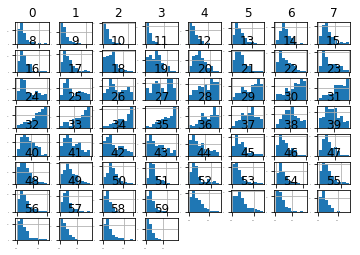

In [30]:
# Histograms
dataset.hist(sharex= False, sharey = False, xlabelsize = 1, ylabelsize = 1)
plt.show()

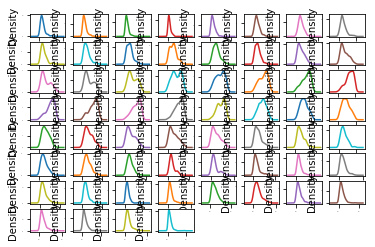

In [31]:
# Density
dataset.plot(kind = 'density', subplots = True, layout = (8, 8), sharex = False, legend = False, fontsize = 1)
plt.show()

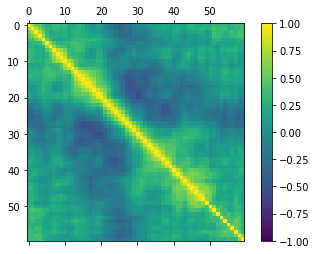

In [35]:
# Correlation Matrix 
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin = -1, vmax = 1, interpolation='none')
fig.colorbar(cax)
plt.show()

## 4. Evaluate Algorithms
- a) Split-out validation dataset
- b) Test options and evaluation metric
- c) Spot Check Algorithms
- d) Compare Algorithms

In [37]:
# Split out validation set 
array = dataset.values
X = array[:, :-1]
y = array[:, -1]

validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = validation_size, random_state = seed)

In [38]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [40]:
# Spot checking 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f"%(name, cv_results.mean())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.782721
LDA: 0.746324
CART: 0.711397
SVM: 0.608824
NB: 0.648897
KNN: 0.808088


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni